# Battery Remaining Useful Life (RUL)
Predict the RUL of batteries by features based on voltage and current. #

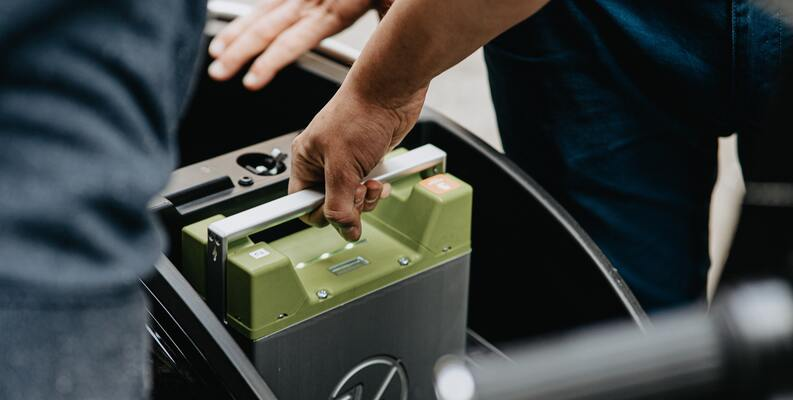

# About Dataset

The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries. The dataset contains the summary of the 14 batteries.

# Variables:

## Cycle Index: number of cycle

## F1: Discharge Time (s)

## F2: Time at 4.15V (s)

## F3: Time Constant Current (s)

## F4: Decrement 3.6-3.4V (s)

## F5: Max. Voltage Discharge (V)

## F6: Min. Voltage Charge (V)

## F7: Charging Time (s)

## Total time (s)

## RUL: target

# You may check on GitHub how the dataset was built: https://github.com/ignavinuales/Battery_RUL_Prediction

# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams # ??
from matplotlib.cm import rainbow # ??
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/배터리_데이터셋_캐글/"    

train_df = pd.read_csv(base_path + "Battery_RUL.csv", encoding="utf-8" )

# submission = pd.read_csv(base_path + "sample_submission.csv",  encoding="utf-8")

# EDA

In [6]:
train_df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [11]:
train_df.head(10).style.set_properties(**{"background-color": "#63B4B8","color": "black","border-color": "black"})  # **의 의미가 뭘까?

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.000000,2595.300000,1151.488500,3.670000,3.211000,5460.001000,6755.010000,10777.820000,1112
1,2.000000,7408.640000,1172.512500,4.246000,3.220000,5508.992000,6762.020000,10500.350000,1111
2,3.000000,7393.760000,1112.992000,4.249000,3.224000,5508.993000,6762.020000,10420.380000,1110
3,4.000000,7385.500000,1080.320667,4.250000,3.225000,5502.016000,6762.020000,10322.810000,1109
4,6.000000,65022.750000,29813.487000,4.290000,3.398000,5480.992000,53213.540000,56699.650000,1107
5,7.000000,3301.180000,1194.235077,3.674000,3.504000,5023.633636,5977.380000,5977.380000,1106
6,8.000000,5955.300000,1220.135329,4.013000,3.501000,5017.495000,5967.550000,5967.550000,1105
7,9.000000,5951.200000,1220.135329,4.014000,3.501000,5017.496000,5962.210000,5962.210000,1104
8,10.000000,5945.440000,1216.920914,4.014000,3.501000,5009.993667,5954.910000,5954.910000,1103
9,11.000000,435251.490000,263086.078000,4.267000,3.086000,269.984000,443700.020000,443700.020000,1102


In [12]:
train_df.tail(10).style.set_properties(**{"background-color": "#63B4B8","color": "black","border-color": "black"})

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
15054,1103.000000,777.440000,182.666667,3.775000,3.741000,929.913000,1412.310000,6685.560000,9
15055,1104.000000,777.120000,182.666667,3.774000,3.742000,929.975000,1412.380000,6700.500000,8
15056,1105.000000,775.690000,181.813333,3.773000,3.742000,926.312000,1412.310000,6668.310000,7
15057,1106.000000,774.440000,181.888444,3.774000,3.742000,926.313000,1412.310000,6727.250000,6
15058,1107.000000,773.000000,180.480000,3.774000,3.742000,922.712000,1412.310000,6659.620000,5
15059,1108.000000,770.440000,179.523810,3.773000,3.742000,922.775000,1412.380000,6678.880000,4
15060,1109.000000,771.120000,179.523810,3.773000,3.744000,915.512000,1412.310000,6670.380000,3
15061,1110.000000,769.120000,179.357143,3.773000,3.742000,915.513000,1412.310000,6637.120000,2
15062,1111.000000,773.880000,162.374667,3.763000,3.839000,539.375000,1148.000000,7660.620000,1
15063,1112.000000,677537.270000,142740.640000,4.206000,3.305000,49680.004000,599830.140000,599830.140000,0


# 결측치 제거

결과: 결측치 없음

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [8]:
train_df.isna().sum() #Check for null values

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

# 중복 제거

결과: 중복 없음

In [36]:
# 중복확인
print(f'Duplicates in the dataset: {train_df.duplicated().sum()}')
print(f'Percentage of duplicates: {train_df.duplicated().sum()/len(train_df)*100}%') # if 0.0 % that means No Duplicate data 즉 전체행에서 빈값의 총 행의 개수를 나누면 비율이 나온다. 그리고 항상 한행에서 여러 빈값이 나올수 있다는 것도 확인 해야한다.

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


In [22]:
train_df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

# 데이터 전처리

In [13]:
train_df.dtypes #check the datatypes of dataset

Cycle_Index                  float64
Discharge Time (s)           float64
Decrement 3.6-3.4V (s)       float64
Max. Voltage Dischar. (V)    float64
Min. Voltage Charg. (V)      float64
Time at 4.15V (s)            float64
Time constant current (s)    float64
Charging time (s)            float64
RUL                            int64
dtype: object

In [17]:
train_df = train_df.astype(int)

In [18]:
train_df.dtypes #check the datatypes of dataset

Cycle_Index                  int64
Discharge Time (s)           int64
Decrement 3.6-3.4V (s)       int64
Max. Voltage Dischar. (V)    int64
Min. Voltage Charg. (V)      int64
Time at 4.15V (s)            int64
Time constant current (s)    int64
Charging time (s)            int64
RUL                          int64
dtype: object

In [23]:
train_df = train_df.round(2) # 소수점까지만 보기

In [25]:
train_df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595,1151,3,3,5460,6755,10777,1112
1,2,7408,1172,4,3,5508,6762,10500,1111
2,3,7393,1112,4,3,5508,6762,10420,1110
3,4,7385,1080,4,3,5502,6762,10322,1109
4,6,65022,29813,4,3,5480,53213,56699,1107
...,...,...,...,...,...,...,...,...,...
15059,1108,770,179,3,3,922,1412,6678,4
15060,1109,771,179,3,3,915,1412,6670,3
15061,1110,769,179,3,3,915,1412,6637,2
15062,1111,773,162,3,3,539,1148,7660,1


Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

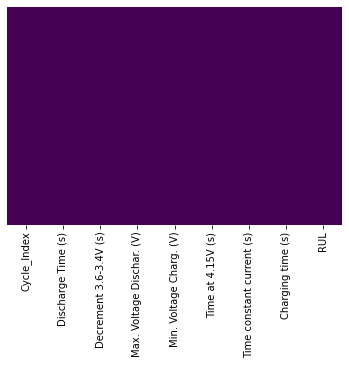

In [31]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train_df.isnull().sum()

In [38]:
train_df.nunique() # To determine the maximum and minimum number of variations in each column of the datase

Cycle_Index                  1124
Discharge Time (s)           1798
Decrement 3.6-3.4V (s)        993
Max. Voltage Dischar. (V)       2
Min. Voltage Charg. (V)         2
Time at 4.15V (s)            2214
Time constant current (s)     989
Charging time (s)            2913
RUL                          1133
dtype: int64

In [49]:
for columns in train_df.columns:
    print(train_df[columns].value_counts(), "\n")

1       14
682     14
684     14
685     14
686     14
        ..
1115     1
369      1
368      1
367      1
379      1
Name: Cycle_Index, Length: 1124, dtype: int64 

1164      57
1200      57
1116      57
1068      53
1908      53
          ..
190698     1
195951     1
186659     1
196804     1
677537     1
Name: Discharge Time (s), Length: 1798, dtype: int64 

302       70
300       68
316       65
340       64
308       61
          ..
3960       1
1070       1
1057       1
1055       1
142740     1
Name: Decrement 3.6-3.4V (s), Length: 993, dtype: int64 

3    13489
4     1575
Name: Max. Voltage Dischar. (V), dtype: int64 

3    15046
4       18
Name: Min. Voltage Charg. (V), dtype: int64 

1623     39
4040     37
1700     34
1448     34
1628     32
         ..
2400      1
2651      1
2215      1
2415      1
49680     1
Name: Time at 4.15V (s), Length: 2214, dtype: int64 

2096      198
2132      178
2276      165
2456      165
2348      163
         ... 
1449        1
1365      

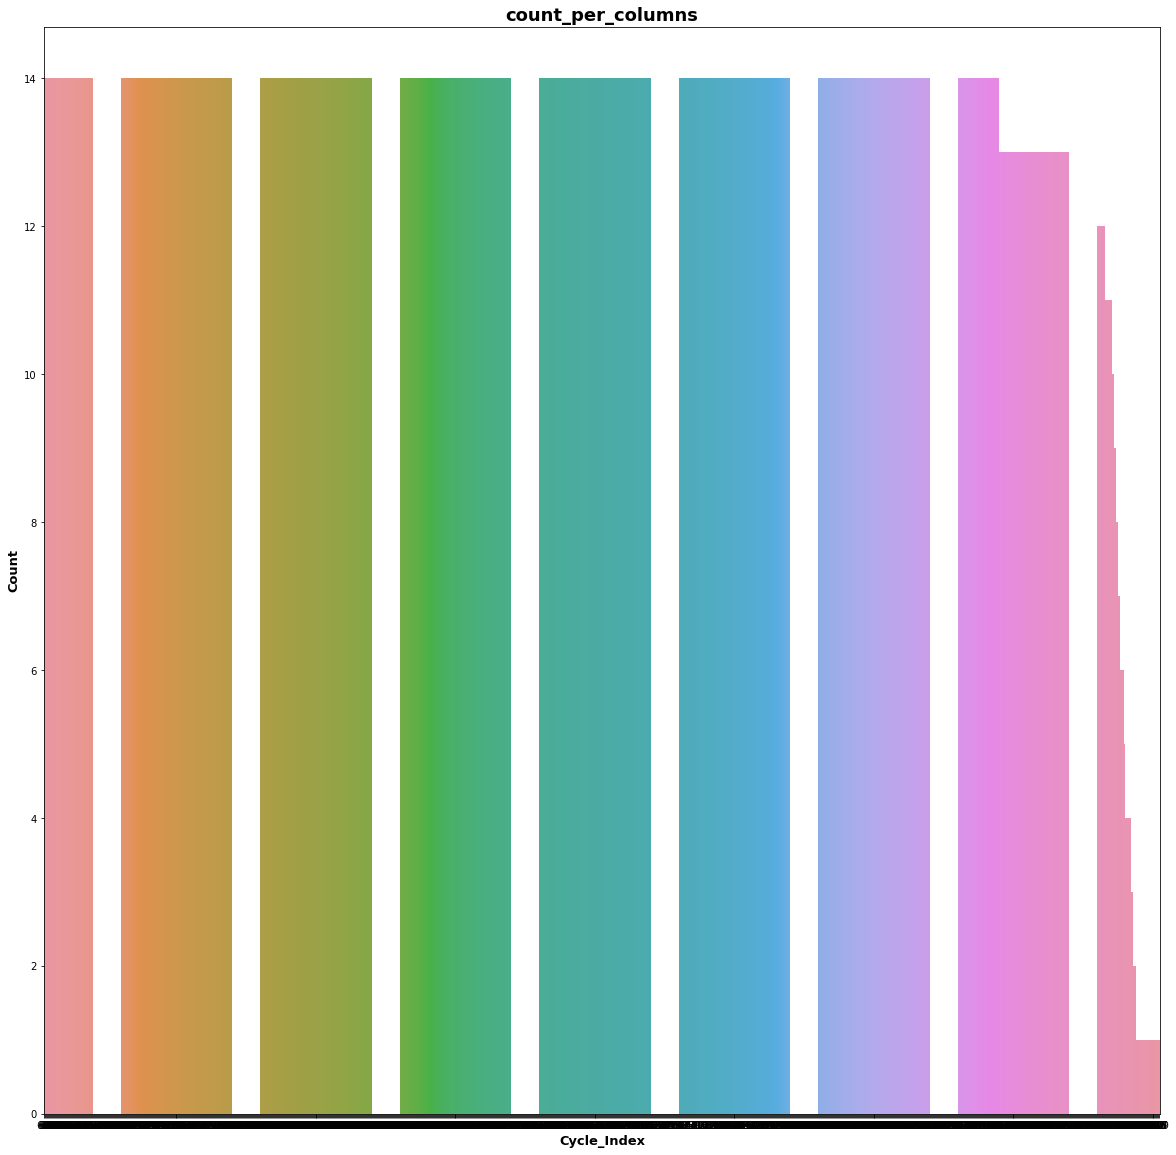

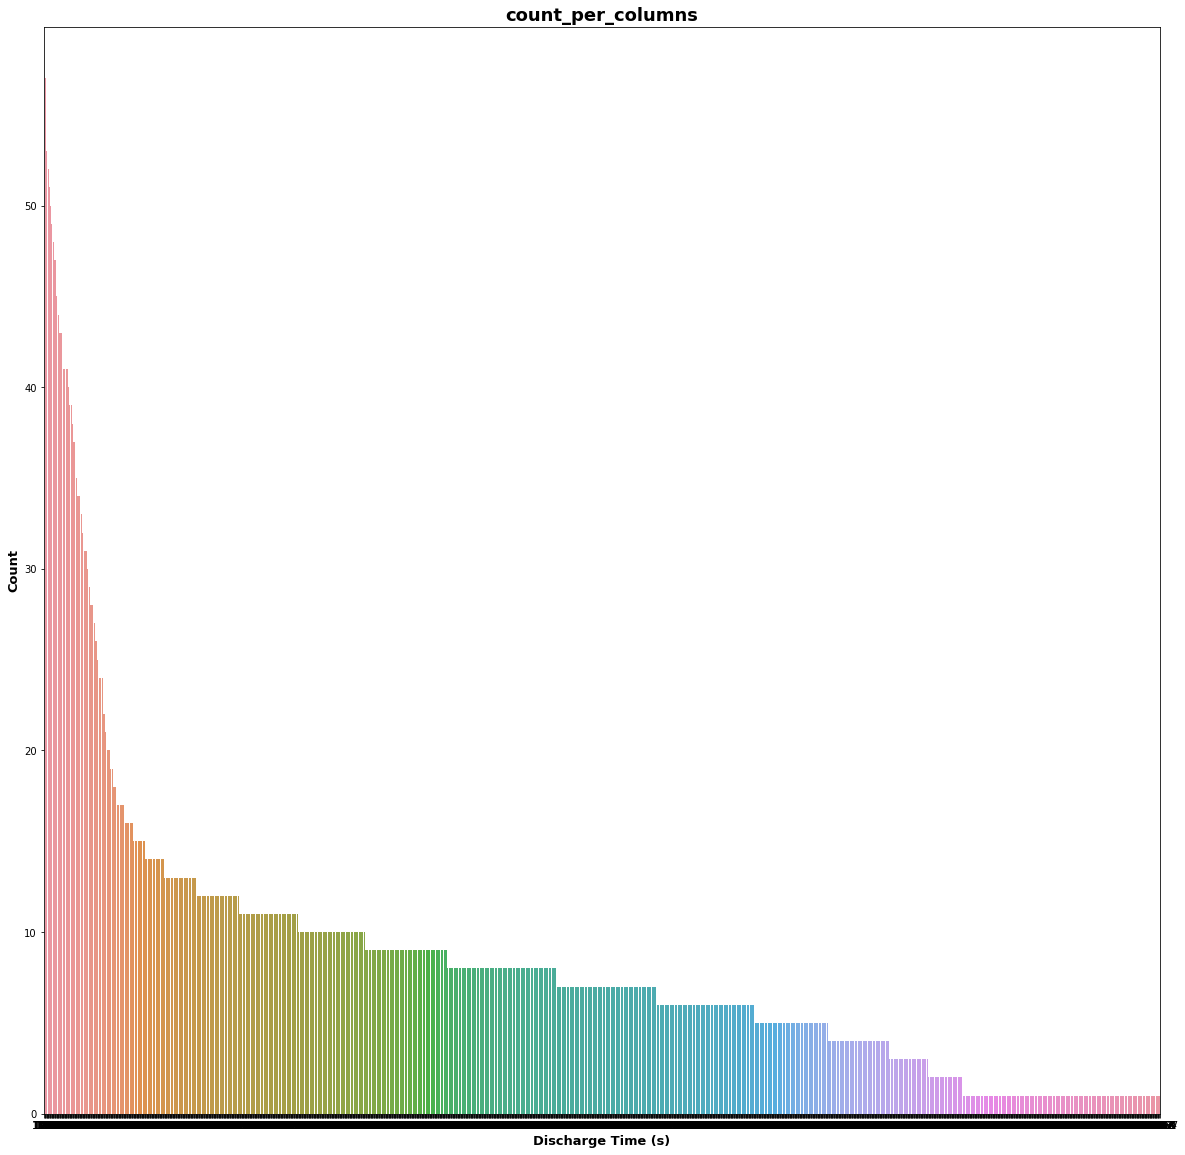

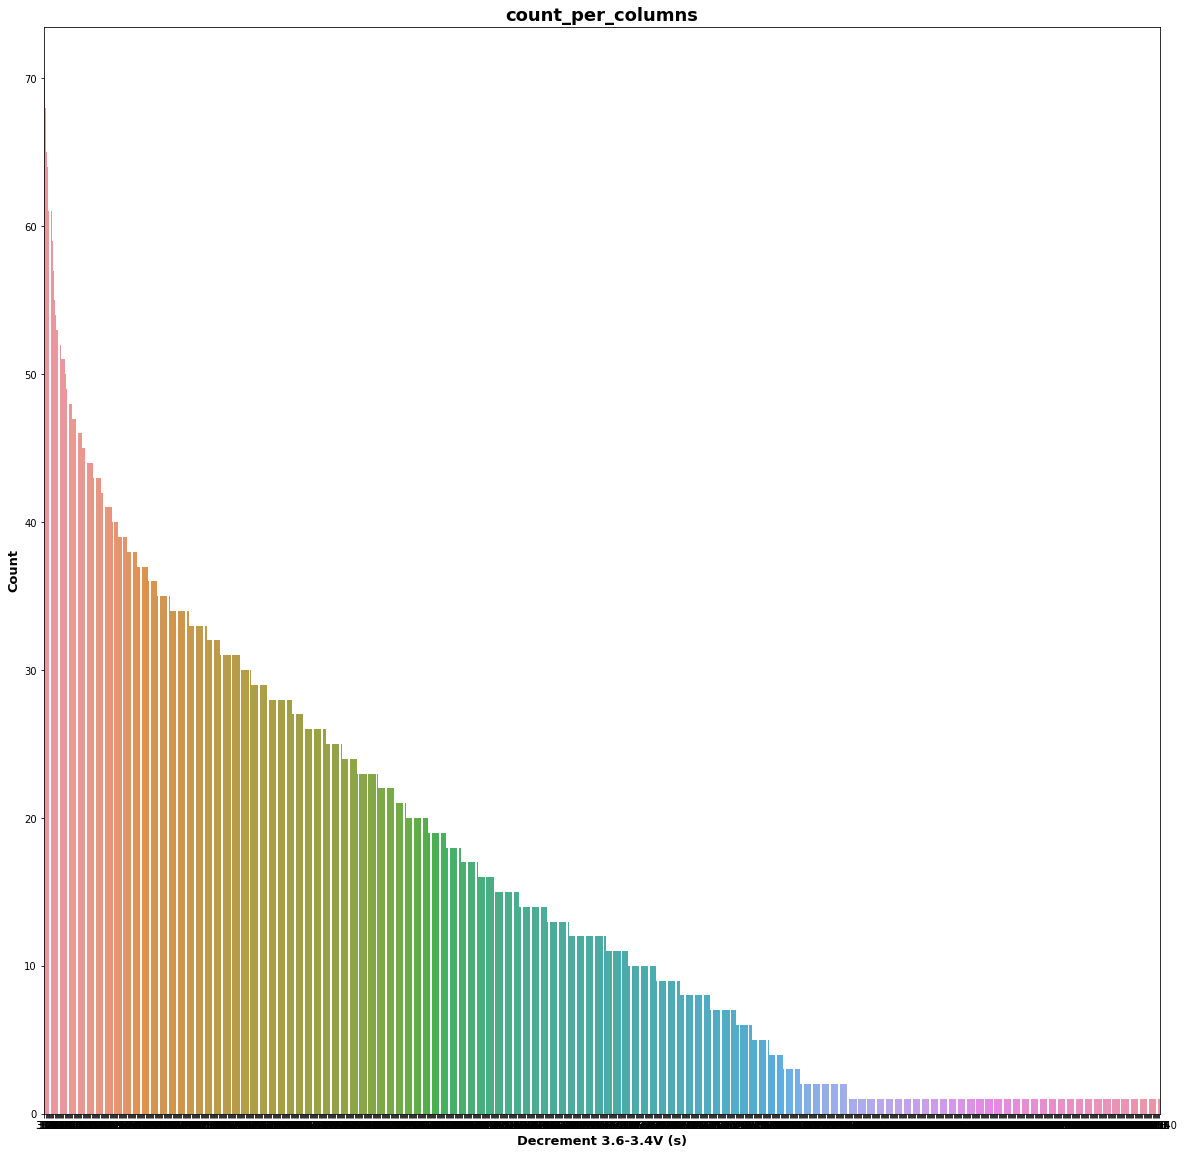

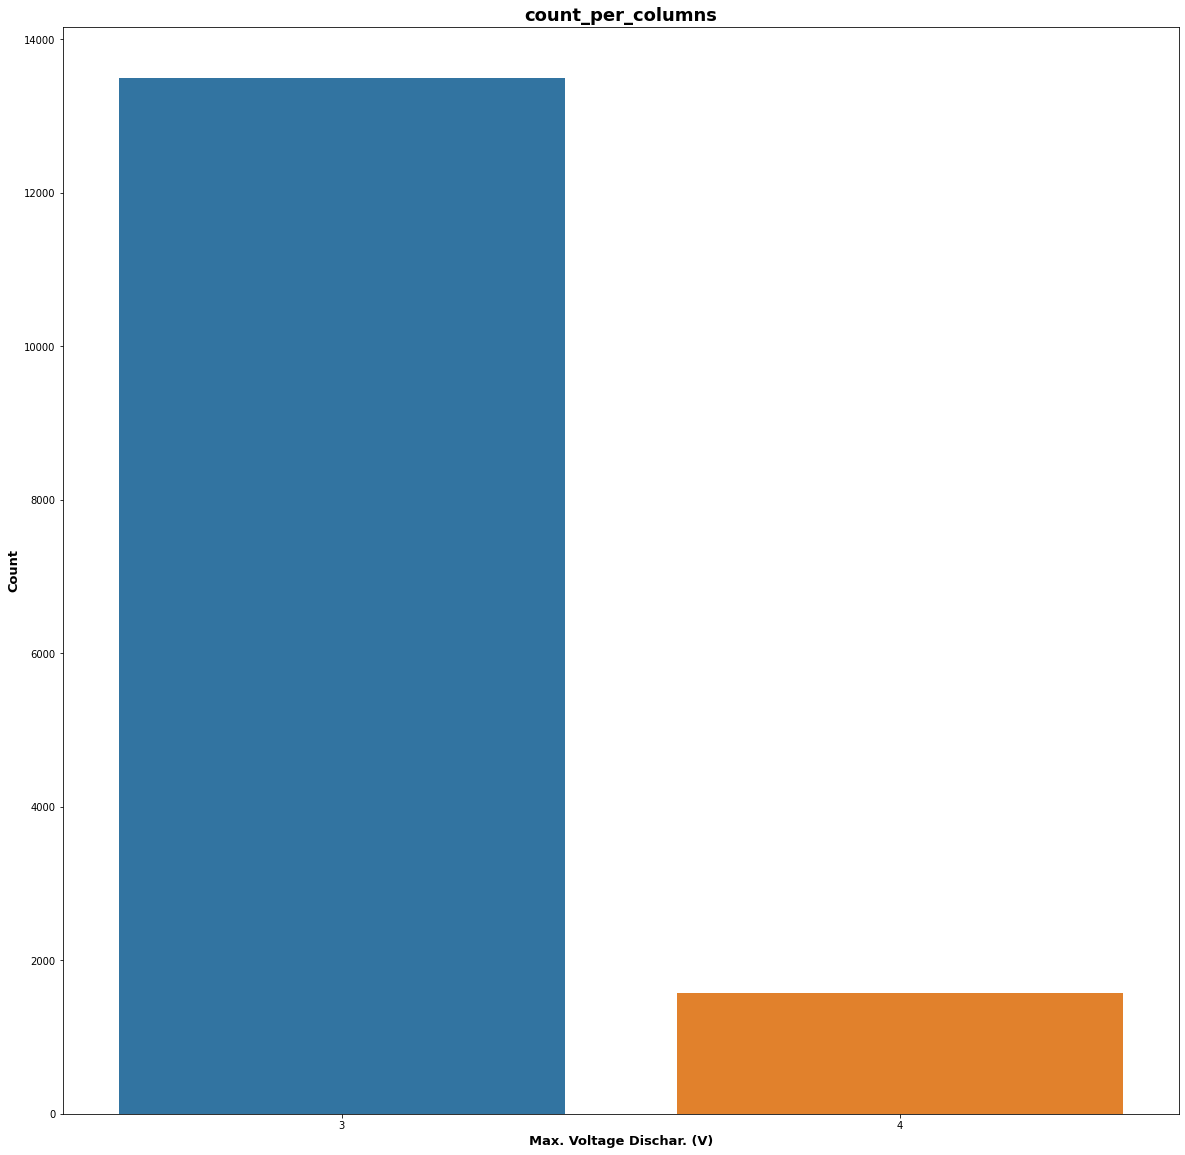

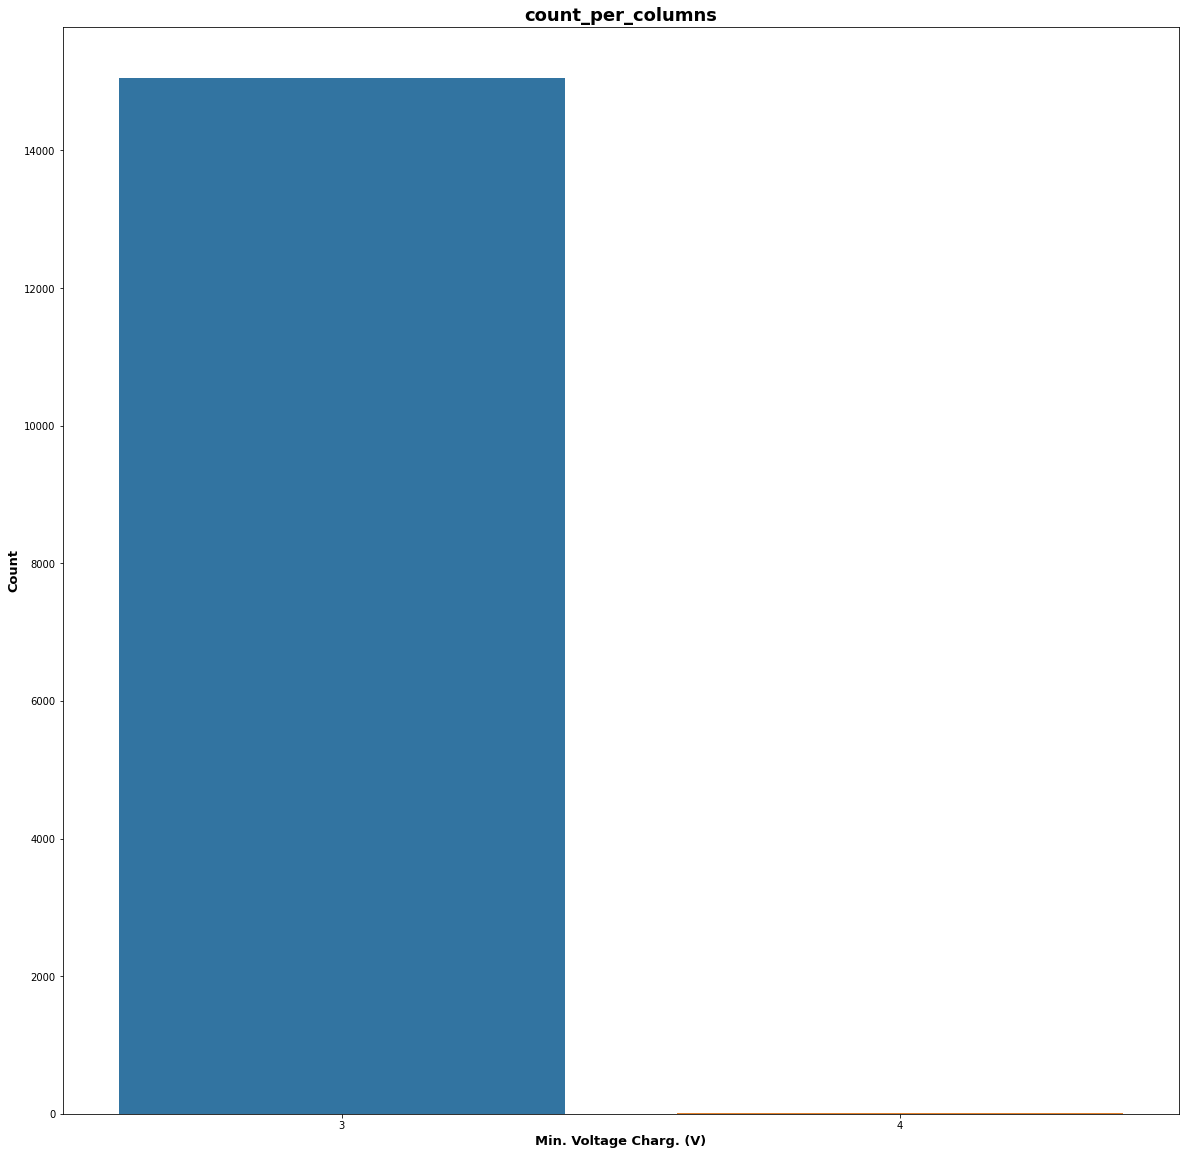

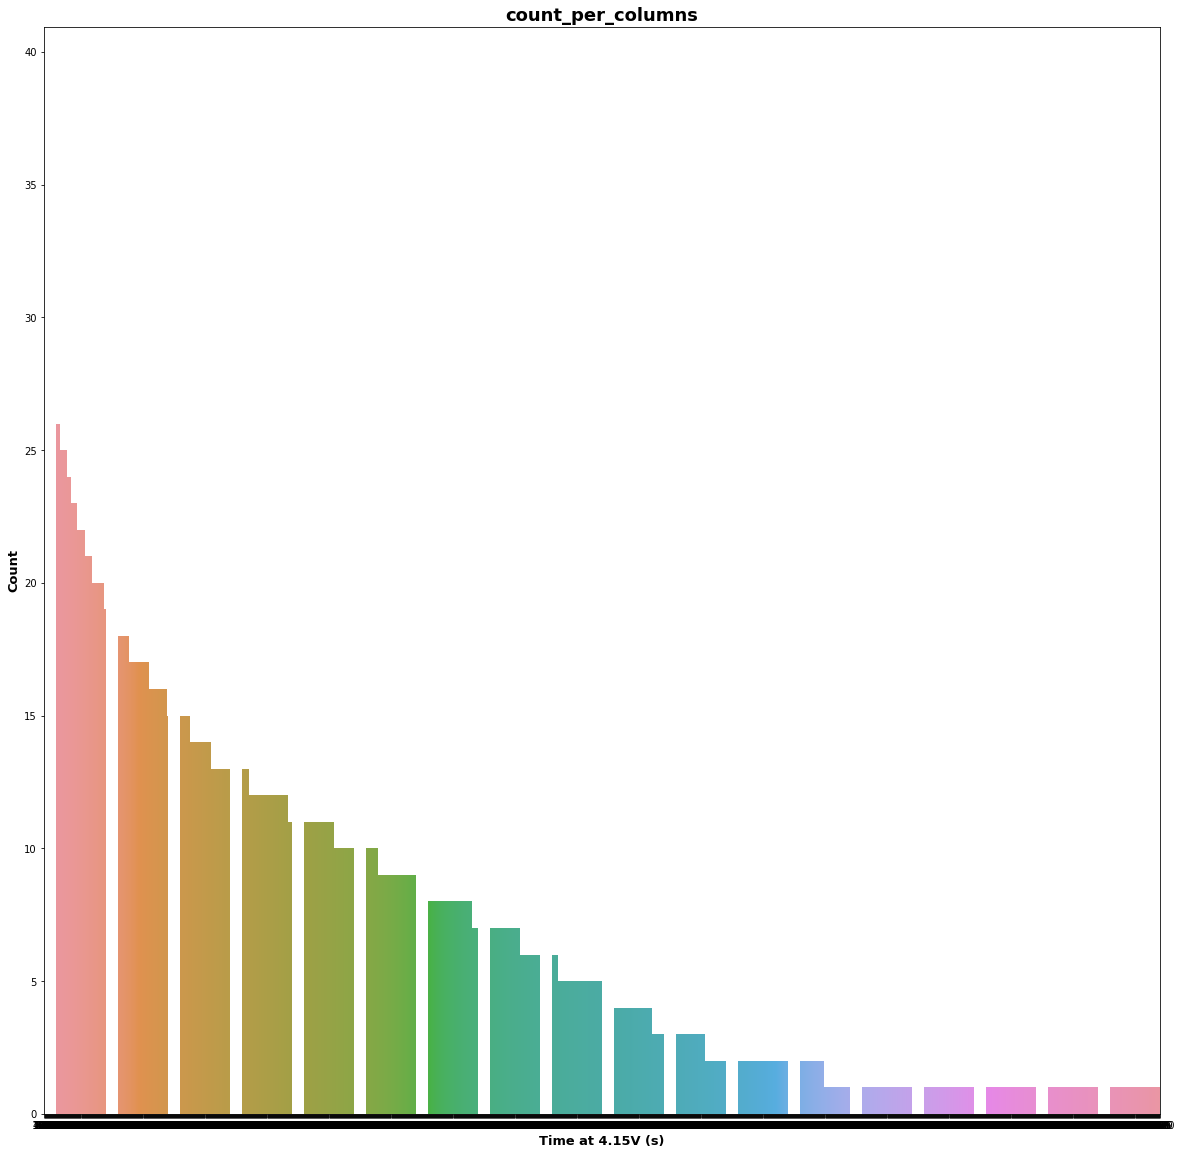

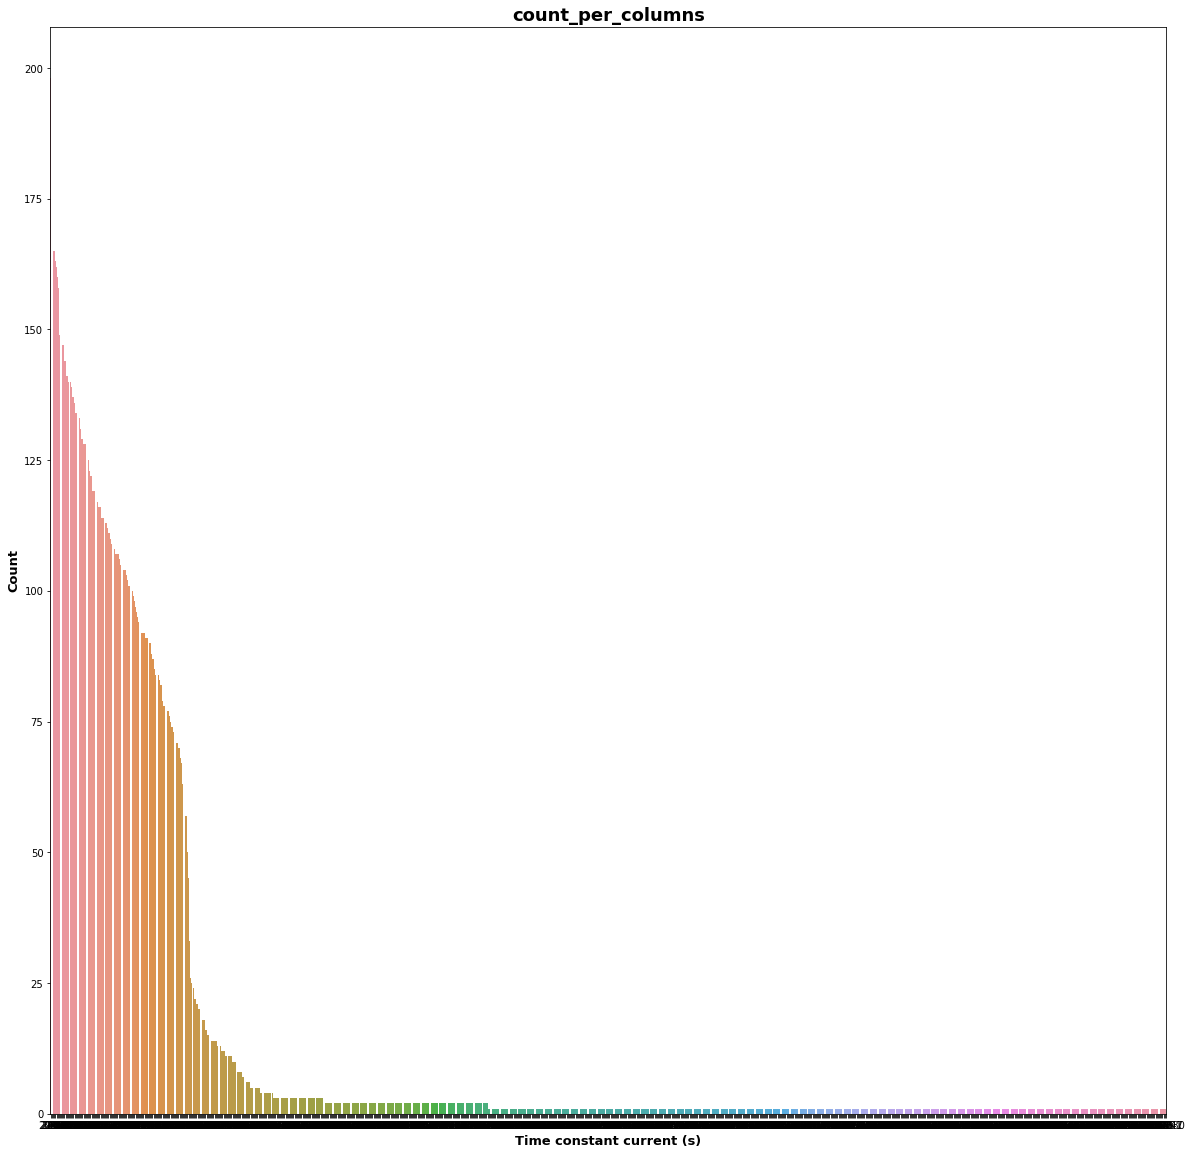

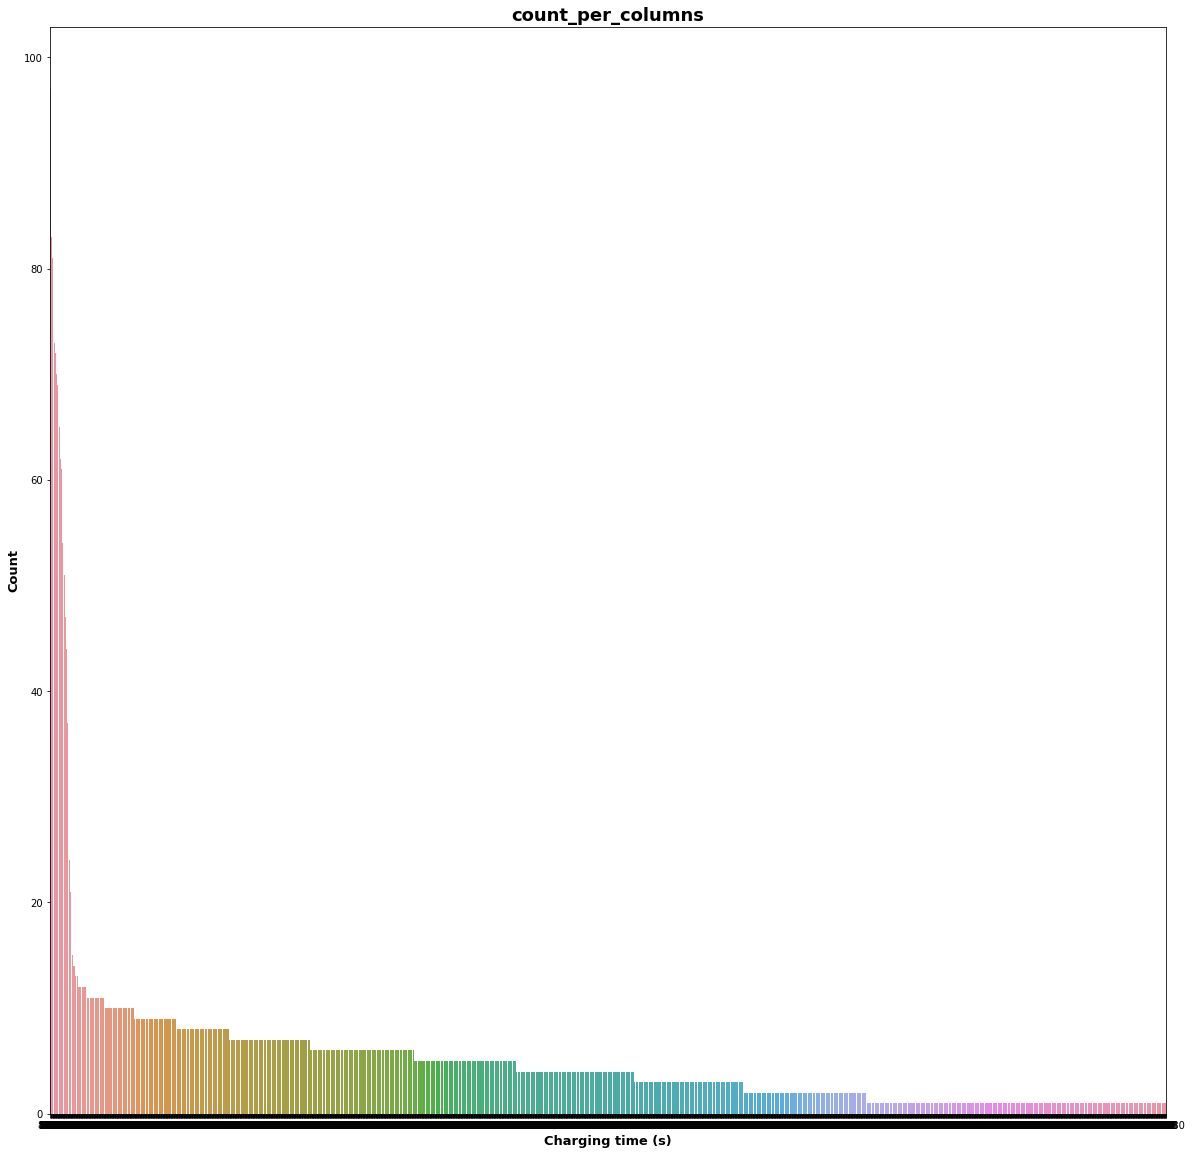

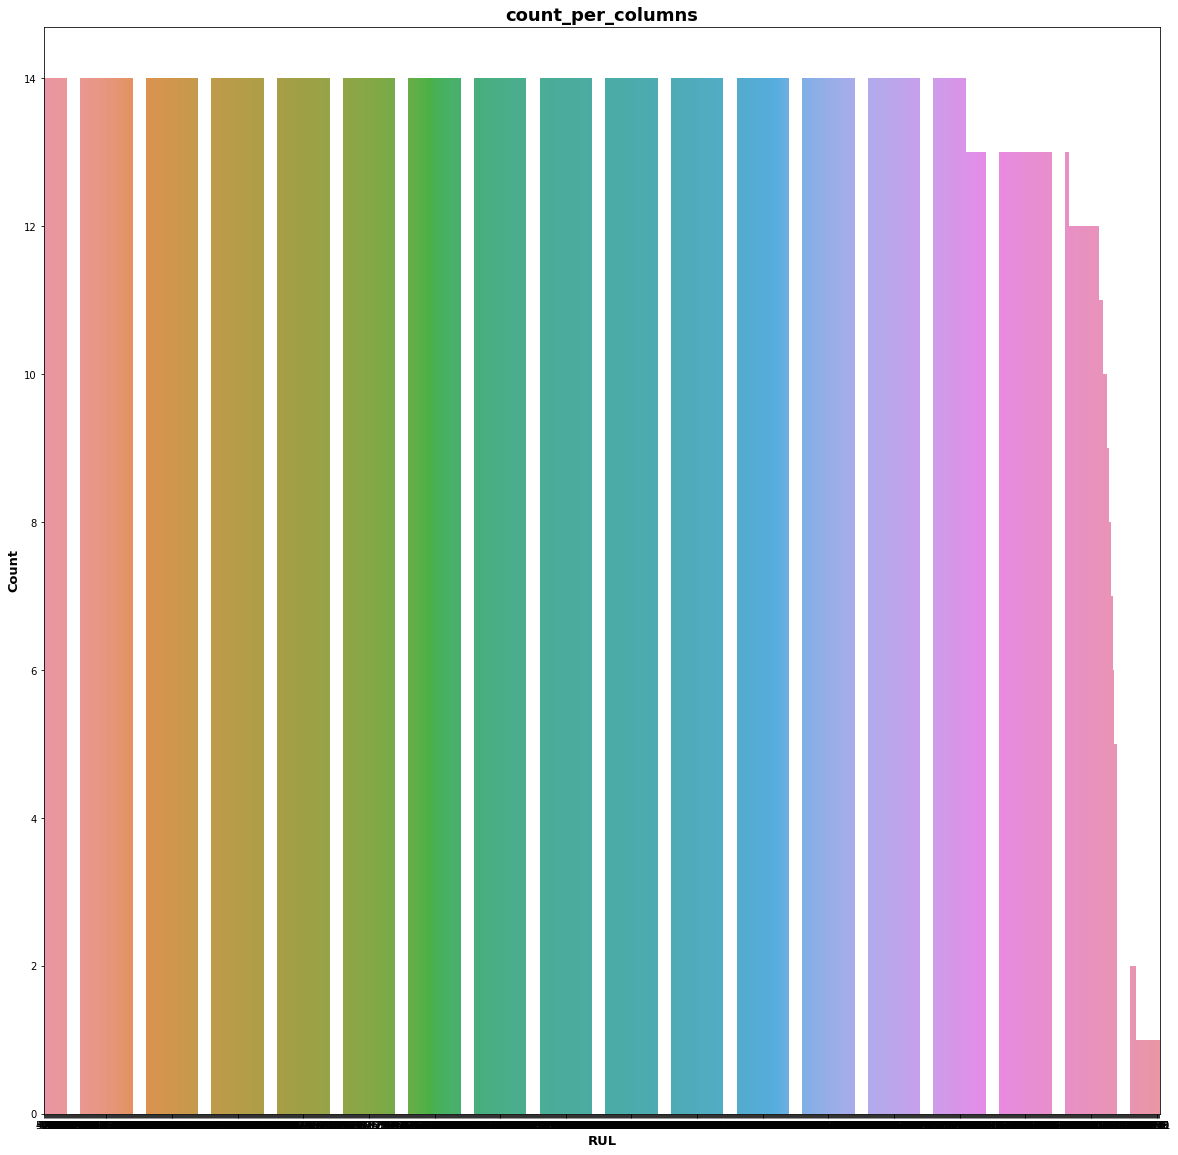

In [55]:
for columns in train_df.columns:
    plt.figure(figsize=(20,20))
    sns.countplot(x = train_df[columns], order = train_df[columns].value_counts().index)
    plt.title("count_per_columns",fontsize = 18,fontweight = 'bold')
    plt.xlabel(columns,fontsize = 13,fontweight = 'bold')
    plt.ylabel("Count",fontsize=13,fontweight = 'bold')
    plt.show()

In [ ]:
min(words_per_comments_train),max(words_per_comments_train)

(1, 1274)

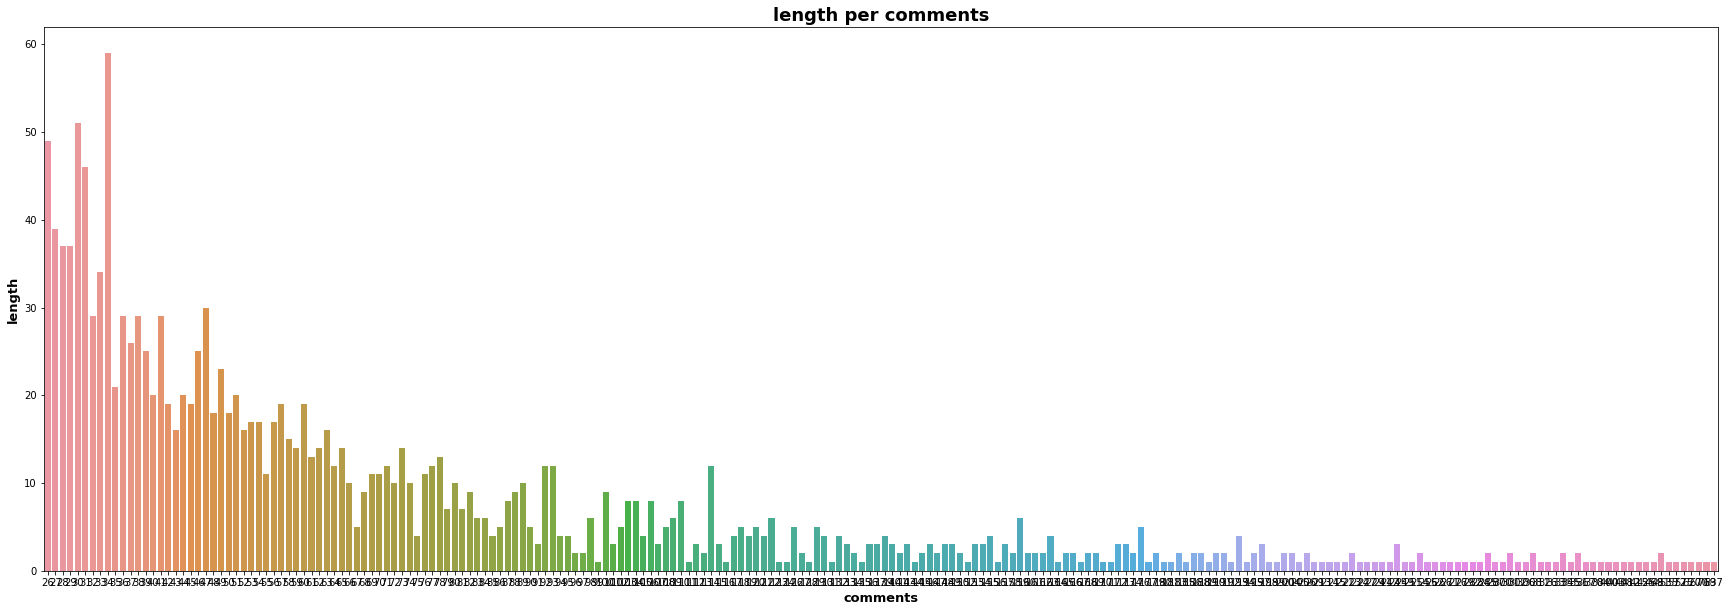

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x = words_per_comments_test_df)
plt.title("length per comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("comments",fontsize = 13,fontweight = 'bold')
plt.ylabel("length",fontsize=13,fontweight = 'bold')
plt.show()

# 통계

In [61]:
# data describtio
train_df.describe().style.background_gradient() # Significant higher and lower values in a dataset are highlighted

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4580.884958,1239.447358,3.104554,3.001195,3767.908789,5460.939923,10066.046004,554.194172
std,322.378480,33144.001103,15039.566297,0.305988,0.034548,9129.537311,25155.832956,26415.350763,322.434514
min,1.000000,8.000000,-397645.000000,3.000000,3.000000,-113.000000,5.000000,5.000000,0.000000
25%,271.000000,1169.000000,319.000000,3.000000,3.000000,1828.000000,2564.000000,7841.750000,277.000000
50%,560.000000,1557.000000,439.000000,3.000000,3.000000,2930.000000,3824.000000,8320.000000,551.000000
75%,833.000000,1908.000000,600.000000,3.000000,3.000000,4088.000000,5012.000000,8763.000000,839.000000
max,1134.000000,958320.000000,406703.000000,4.000000,4.000000,245101.000000,880728.000000,880728.000000,1133.000000


# 피처 작업

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

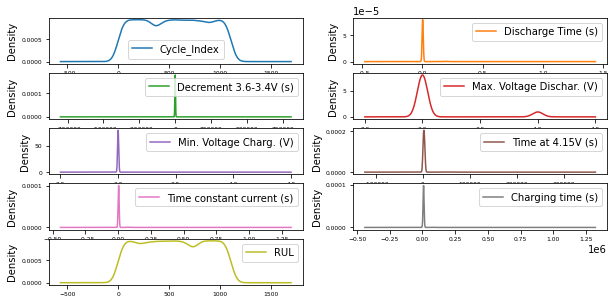

In [62]:
# Let's have a look at the numerical value density.
train_df.plot(kind='density', subplots=True, layout=(10,2), sharex=False, 
                     sharey=False,fontsize=6, figsize=(10,10))# Let's have a look at the numerical value density.

# Output variable columns have a correlation.

HEATMAP


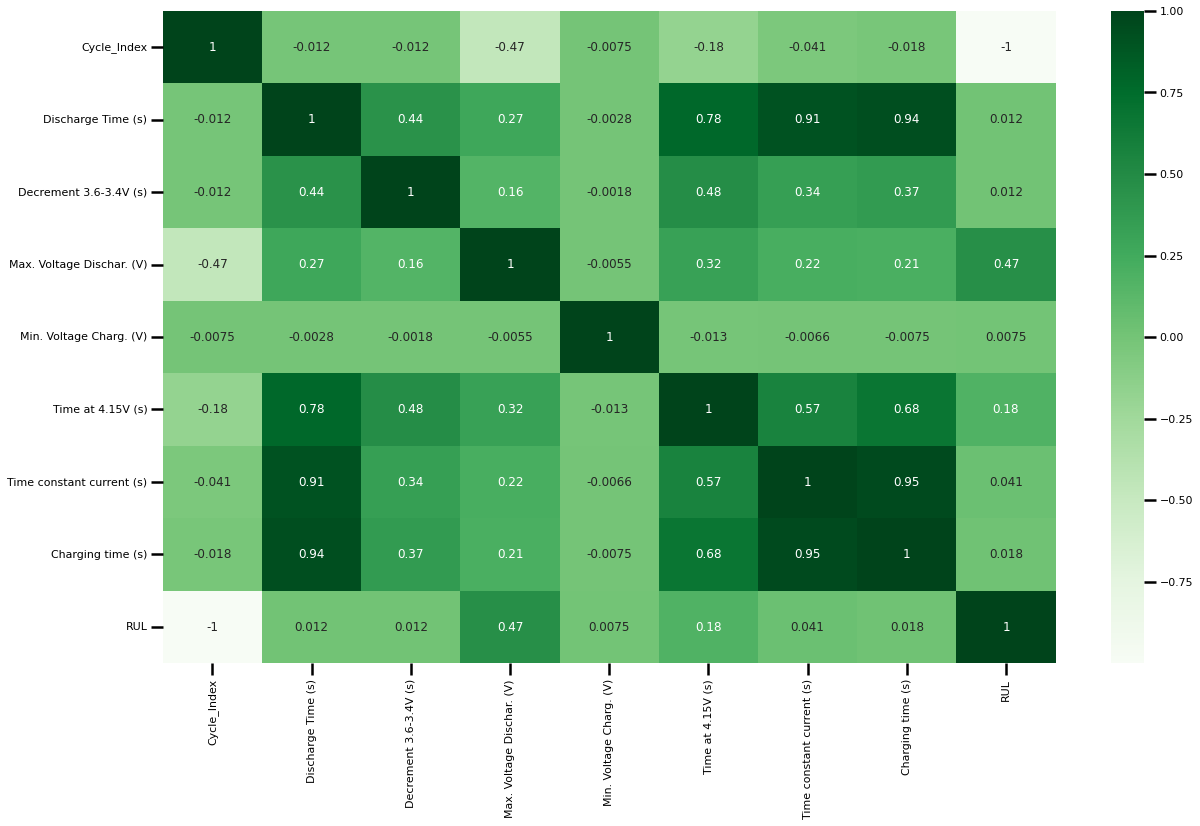

In [68]:
# heatmap graph for finding  correlation of column 
print("HEATMAP")
#get the correlation
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(20,12))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

<Axes: >

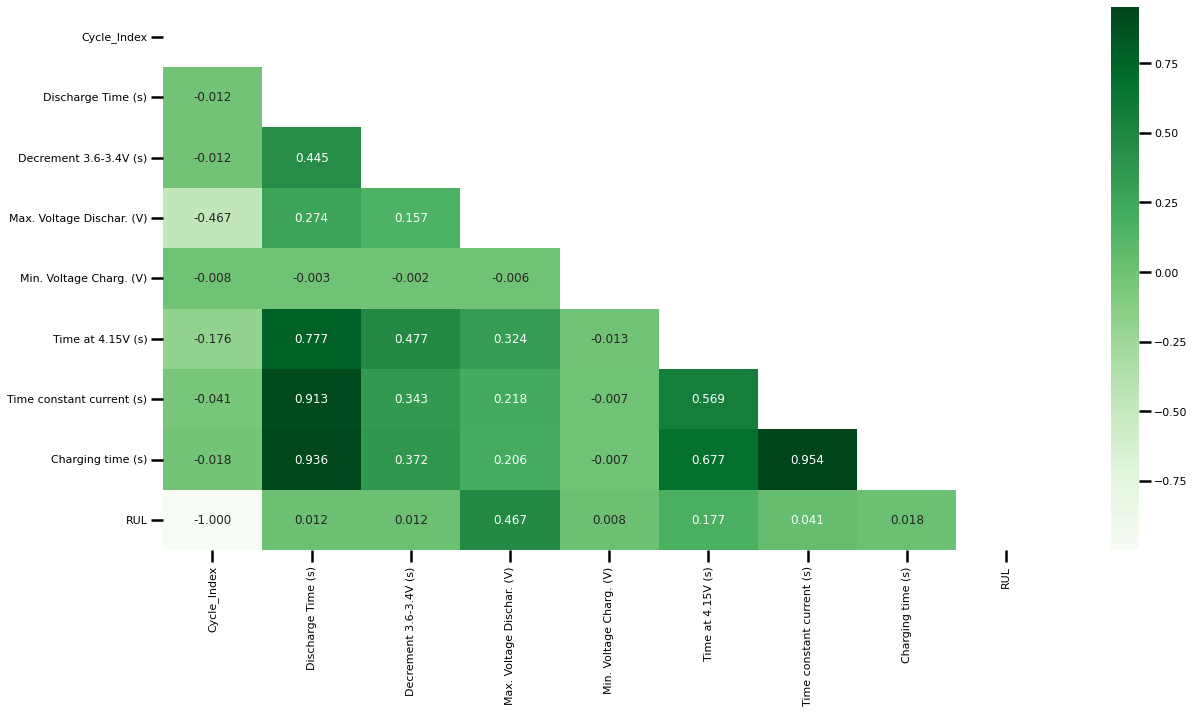

In [67]:
mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = train_df.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Greens')

In [69]:
#Correlation with output variable
cor_target = abs(cor["Time constant current (s)"])
#Selecting highly correlated features
relevant_features = cor_target #[cor_target>0.5]
relevant_features

Cycle_Index                  0.040622
Discharge Time (s)           0.912536
Decrement 3.6-3.4V (s)       0.343228
Max. Voltage Dischar. (V)    0.218269
Min. Voltage Charg. (V)      0.006637
Time at 4.15V (s)            0.568921
Time constant current (s)    1.000000
Charging time (s)            0.953522
RUL                          0.040675
Name: Time constant current (s), dtype: float64

In [70]:
relevant_features = cor_target [cor_target>0.5]
relevant_features

Discharge Time (s)           0.912536
Time at 4.15V (s)            0.568921
Time constant current (s)    1.000000
Charging time (s)            0.953522
Name: Time constant current (s), dtype: float64

The following columns have a strong relationship. [Time to Discharge (s)] 0.912536
[Time (s) at 4.15V] 0.568922

[Constant current time (s)] 1.000000

[Charging time in seconds] 0.953522

<Axes: >

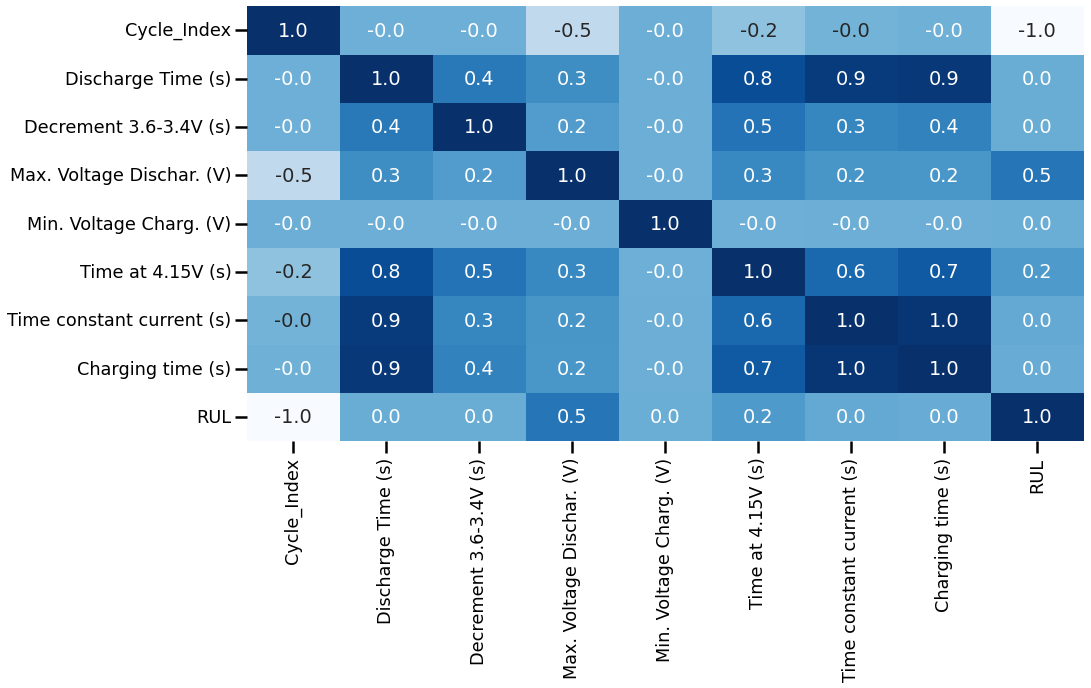

In [72]:
# High Correlation Columns Heatmap¶
plt.figure(figsize=(15,8))
sns.set_context('poster', font_scale=0.8)
sns.heatmap(train_df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

Observations:
RUL's most essential factors ( Predict the remaining useful life ) is , Time constant current (s), Charging time (s), and Maximum Voltage Discharge (V) in Time at 4.15V (s)' Reduce the voltage to 3.6-3.4V. (s)

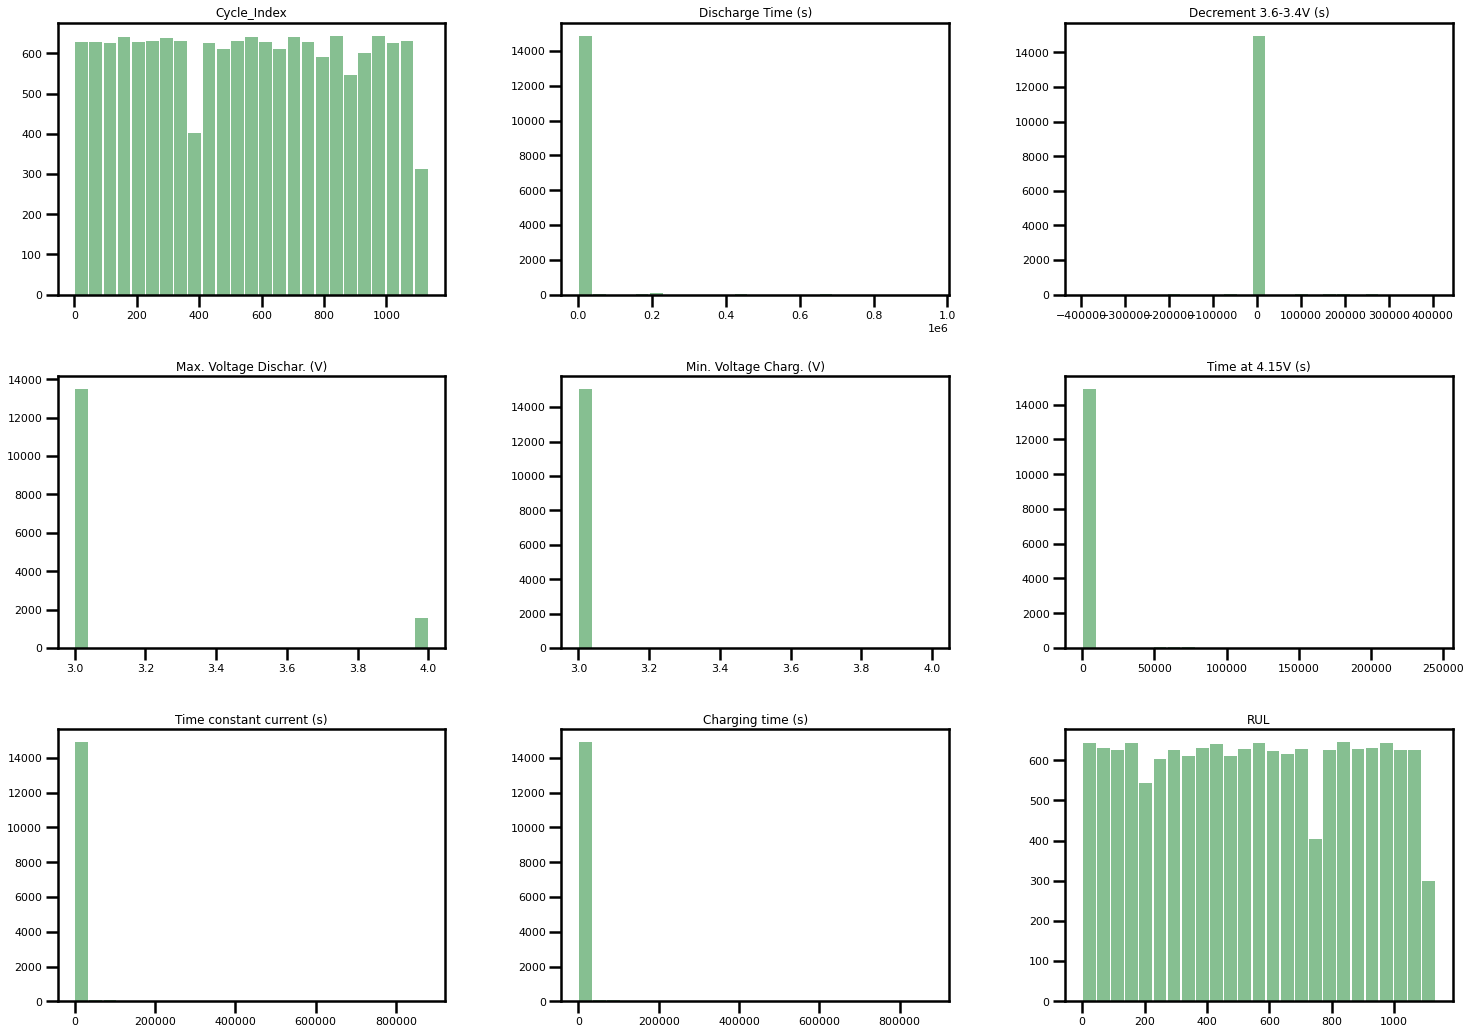

In [74]:
#study the data
sns.set_context('poster', font_scale=0.5)
train_df.hist(bins=25, grid=False, figsize=(25,18), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

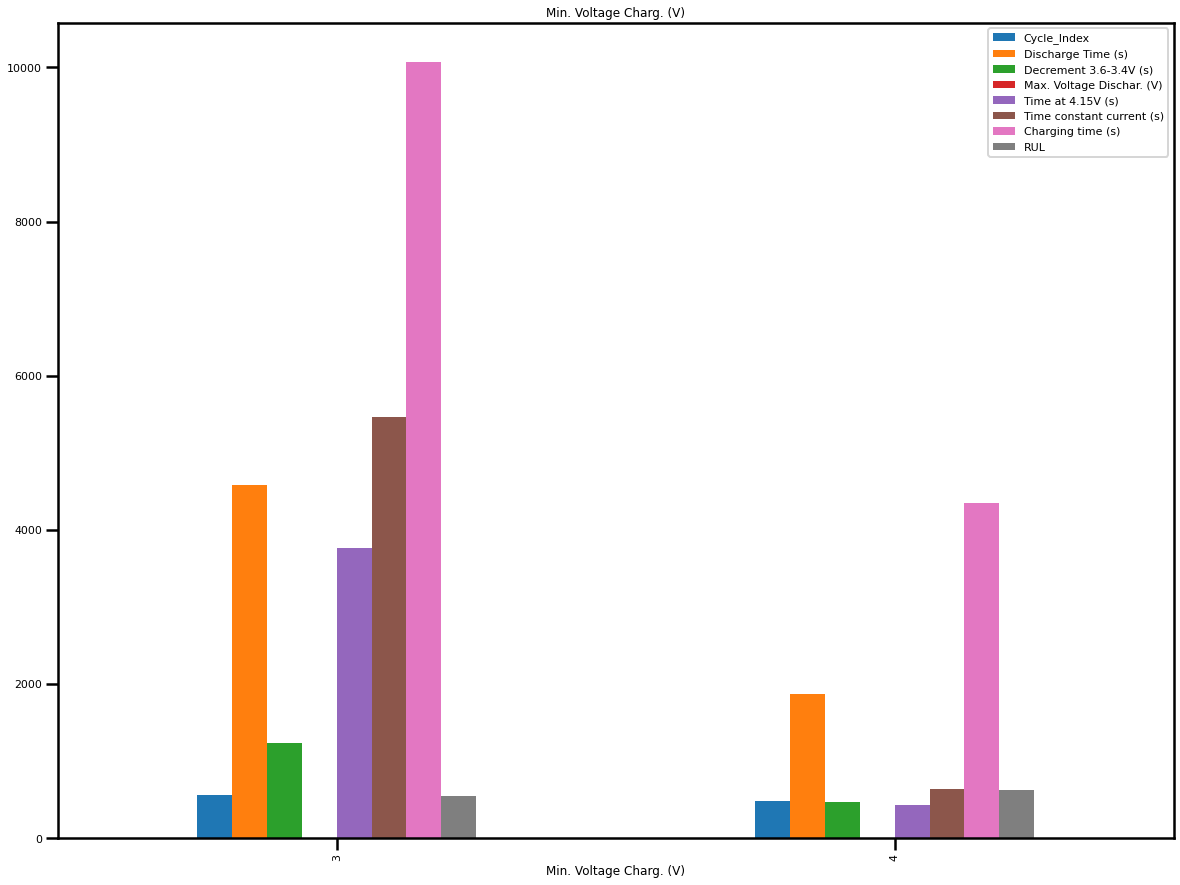

In [83]:
# data visualisation on [ Min. Voltage Charg. (V) ]
sns.set_context('poster', font_scale=0.5)
train_df.groupby('Min. Voltage Charg. (V)').mean().plot(kind='bar', figsize=(20,15)) 
plt.xlabel('Min. Voltage Charg. (V)')
plt.ylabel('')
plt.title('Min. Voltage Charg. (V)')
plt.show()

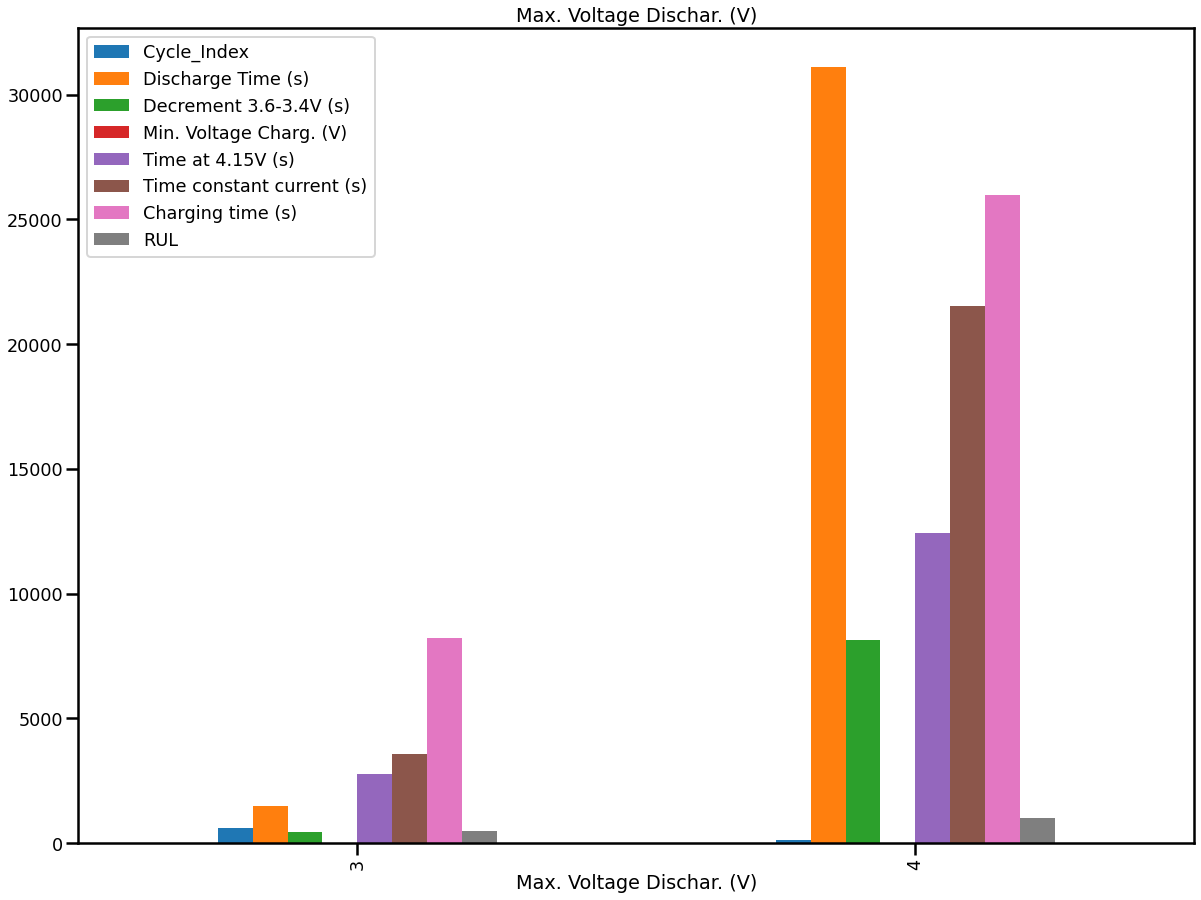

In [85]:
# data visualisation on [ Max. Voltage Dischar. (V) ]
sns.set_context('poster', font_scale=0.8)
train_df.groupby('Max. Voltage Dischar. (V)').mean().plot(kind='bar', figsize=(20,15)) 
plt.xlabel('Max. Voltage Dischar. (V)')
#plt.ylabel('')
plt.title('Max. Voltage Dischar. (V)')
plt.show()

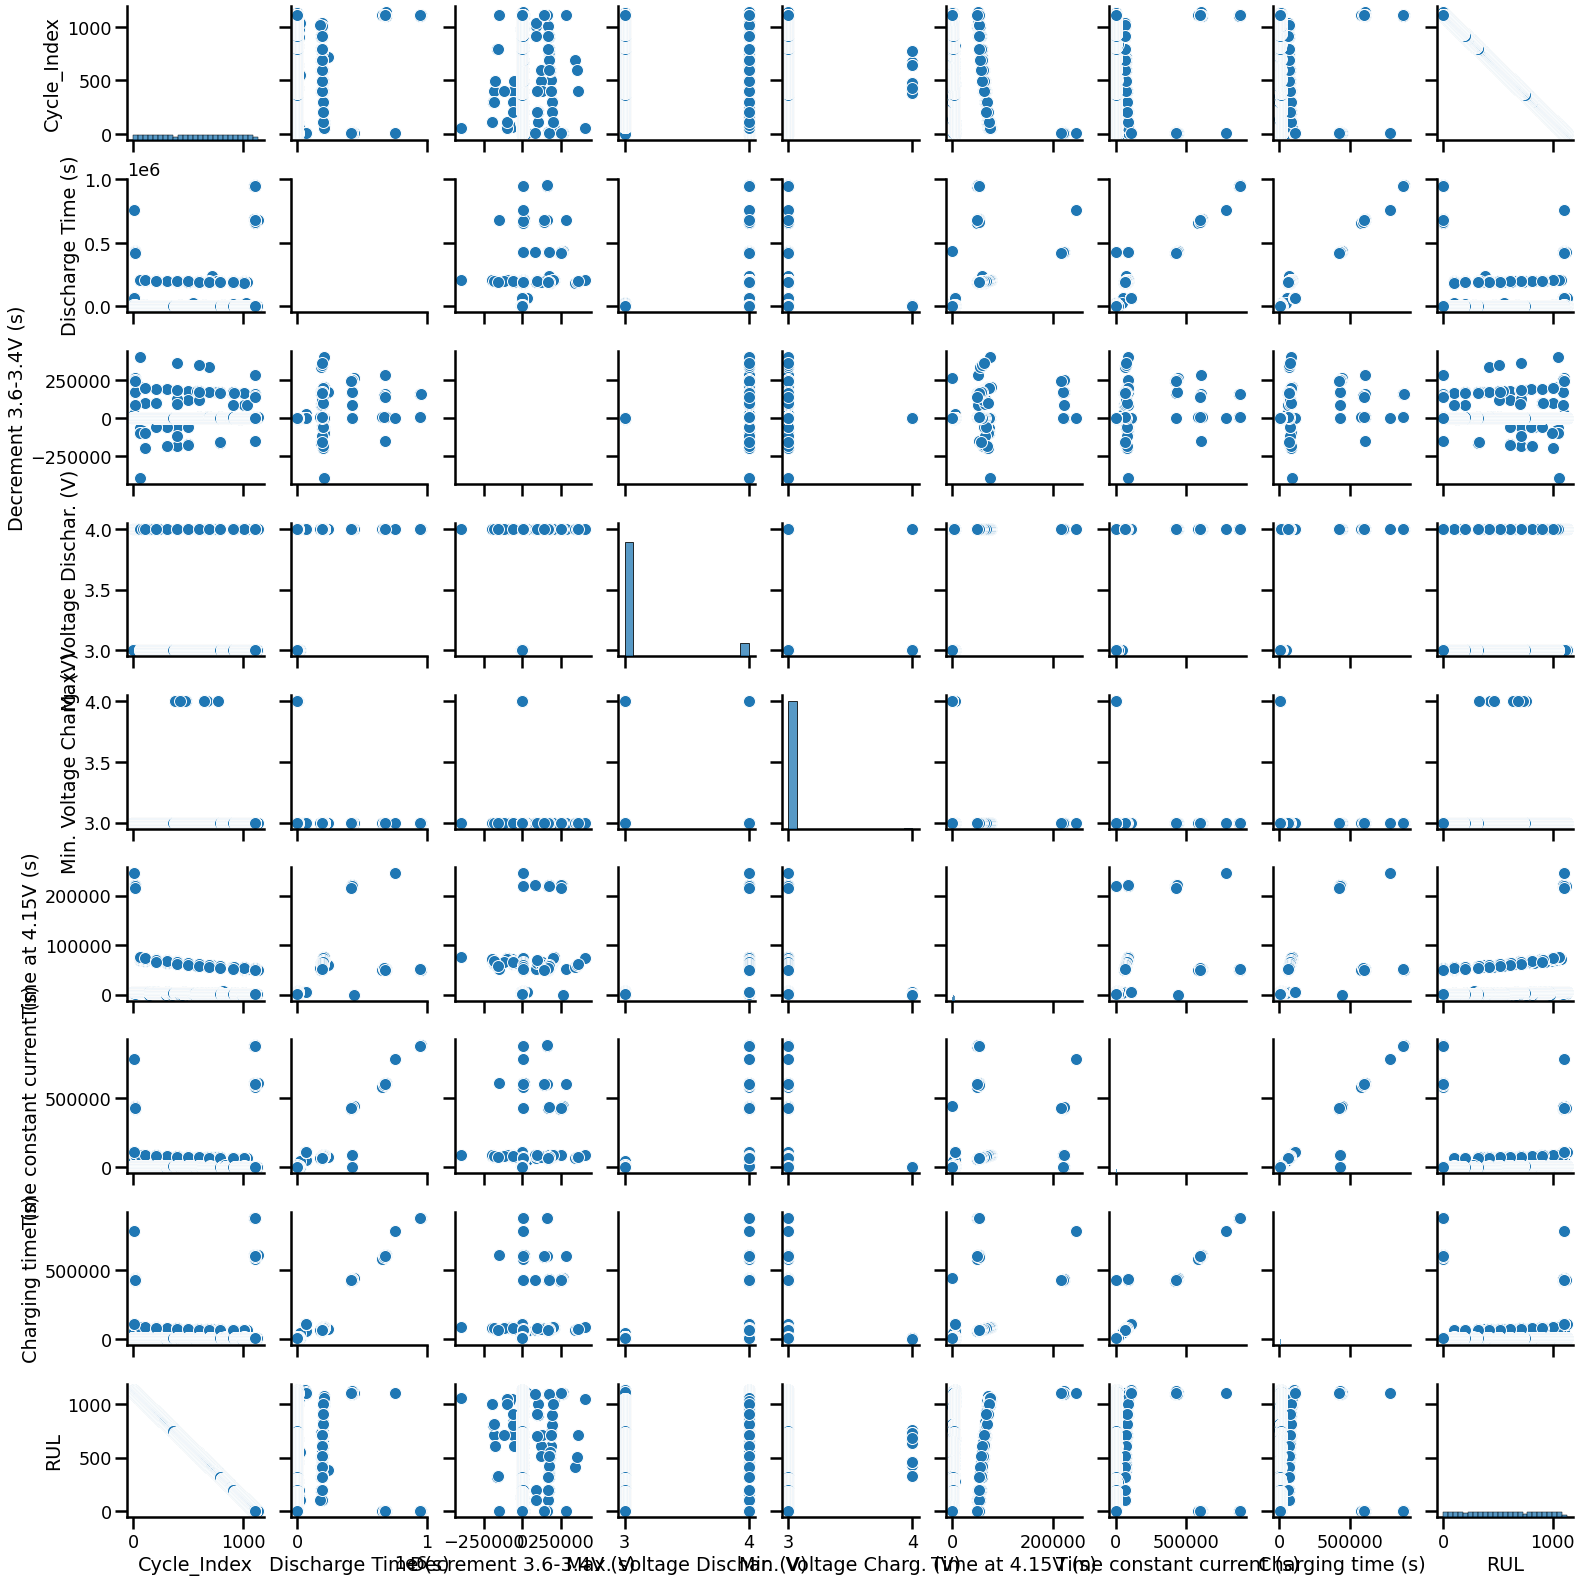

In [87]:
sns.pairplot(train_df)

# Correlation between RUL and

## Max. Voltage Dischar. (V) is 0.8

## Min. Voltage Charg. (V) is -0.8

## Time at 4.15V (s) is 0.2

## Cycle index is -1.0

## Discharge Time (s), Decrement 3.6-3.4V (s), Time constant 
## current (s) and Charging time (s)　are 0. And correlation between Time at 4.15V and these four features are 0.8, 0.5,0.6 and 0.7.

## So I drop Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s). And I drop 'Cycle_Index' from features because it may cause leakage.

# 머신러닝 모델

In [88]:
pip install pycaret --ignore-installed llvmlite numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Prepar

In [89]:
pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
!pip install conda -c numba llvmlite

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'numba'


In [91]:
from pycaret.regression import *

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f9568bcc1f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [107]:
train_df_target = train_df.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)'],axis=1)

In [108]:
exp_reg = setup(train_df_target, target = 'RUL',session_id=1)

,Description,Value
0,Session id,1
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(15064, 4)"
4,Transformed data shape,"(15064, 4)"
5,Transformed train set shape,"(10544, 4)"
6,Transformed test set shape,"(4520, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [109]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,40.1783,3684.5730,60.5110,0.9646,0.4338,0.4576,0.3850
xgboost,Extreme Gradient Boosting,40.3855,3984.8013,62.9165,0.9617,0.4257,0.4547,0.4880
rf,Random Forest Regressor,41.5232,4011.2620,63.1865,0.9615,0.4288,0.4276,0.8430
lightgbm,Light Gradient Boosting Machine,41.9332,4310.3340,65.4979,0.9586,0.4566,0.5503,0.2660
dt,Decision Tree Regressor,42.2232,4389.7865,66.0751,0.9578,0.4568,0.4793,0.0510
et,Extra Trees Regressor,42.1627,4427.9220,66.3039,0.9575,0.4405,0.4038,0.8100
knn,K Neighbors Regressor,42.9555,4541.7110,67.3334,0.9563,0.4327,0.3933,0.0830
ada,AdaBoost Regressor,69.8874,8708.9318,93.2711,0.9163,0.6330,1.0934,0.1210
lar,Least Angle Regression,236.6488,81006.6471,284.6027,0.2205,1.0113,2.9529,0.0490
br,Bayesian Ridge,236.6804,81006.7411,284.6029,0.2205,1.0114,2.9532,0.0750


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=1)

In [119]:
reg_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41.6102,3941.0500,62.7778,0.9615,0.5247,0.6199
1,38.7896,3266.3334,57.1518,0.9682,0.4173,0.3615
2,40.7038,4149.9418,64.4200,0.9601,0.4319,0.7254
3,39.7786,4567.2393,67.5814,0.9571,0.4135,0.3233
4,39.7187,3123.3379,55.8868,0.9683,0.4133,0.3712
5,41.3394,4313.8871,65.6802,0.9589,0.4632,0.4377
6,41.8823,3651.7216,60.4295,0.9655,0.4301,0.3891
7,40.3564,4046.7669,63.6142,0.9619,0.4617,0.7133
8,39.3443,2895.5941,53.8107,0.9720,0.3559,0.2756


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

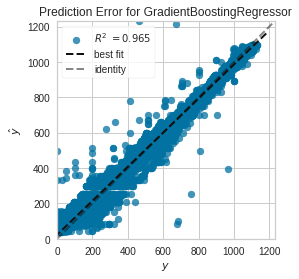

In [120]:
plot_model(reg_model,plot='error')

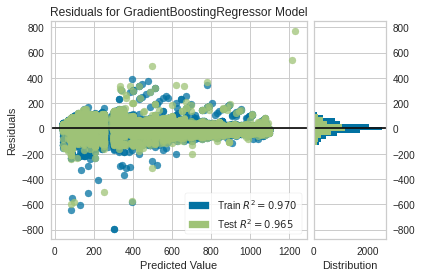

In [121]:
plot_model(reg_model,plot='residuals')

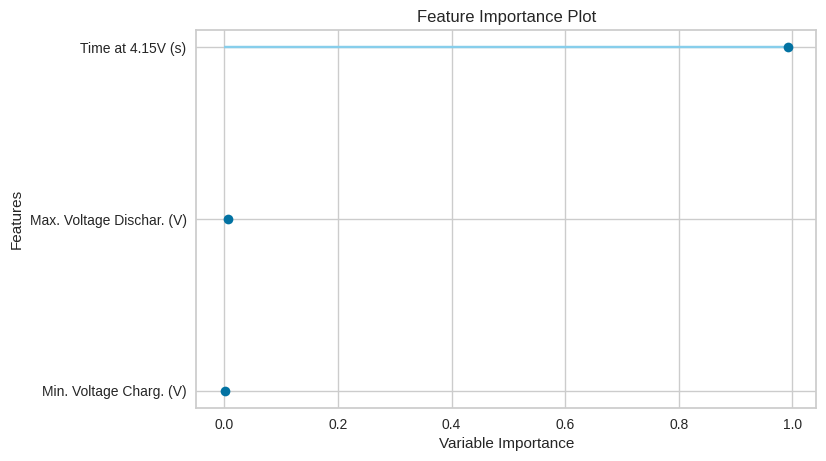

In [122]:
plot_model(reg_model,plot='feature')

In [124]:
gbr = create_model('gbr',verbose=False)
xgb = create_model('xgboost',verbose=False)
rf = create_model('rf', verbose = False)

In [125]:
blend_specific = blend_models(estimator_list = [rf,xgb,gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41.0603,3780.4675,61.4855,0.9631,0.5088,0.5703
1,38.6958,3396.8847,58.2828,0.9669,0.4021,0.3286
2,40.2661,3795.0068,61.6036,0.9635,0.4251,0.7359
3,39.3808,4775.2190,69.1030,0.9551,0.4087,0.3082
4,39.5706,3179.4048,56.3862,0.9677,0.3906,0.3436
5,40.7955,4433.8970,66.5875,0.9577,0.4354,0.3560
6,42.0866,3734.5438,61.1109,0.9647,0.4272,0.3670
7,40.8699,4407.4077,66.3883,0.9586,0.4669,0.7908
8,39.9230,3087.9729,55.5695,0.9701,0.3536,0.2643


Processing:   0%|          | 0/6 [00:00<?, ?it/s]